# SVM и его ядра
__Суммарное количество баллов: 10__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import time

### Задание 1 (7 баллов)

Примените метод SVM (например, из библиотеки sklearn) для датасета blobs2.

Визуализируйте результат (разбиение плоскости и опорные вектора) при разных вариантах ядер (линейное; полиномиальное степеней 2,3,5; RBF).

In [3]:
blobs_data = pd.read_csv('./hw7_data/blobs2.csv')
X = blobs_data['x'].values
Y = blobs_data['y'].values
labels = blobs_data['label'].values
blobs = np.array(list(zip(X, Y)))

In [10]:
def plot_SVM(data, labels, kernel='linear', degree=None):
    if kernel == 'poly':
        clf = SVC(kernel=kernel, degree=degree)
    clf = SVC(kernel=kernel)
    clf.fit(data, labels)
    plt.figure(1, figsize=(10, 14))
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(data[:, 0], data[:, 1], c=labels, zorder=10, cmap=plt.cm.Paired, edgecolors='k')
    plt.axis('tight')
    x_min = -2
    x_max = 5
    y_min = -2
    y_max = 7
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    plt.figure(1, figsize=(10, 14))
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],levels=[-.5, 0, .5])
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())

Линейное ядро

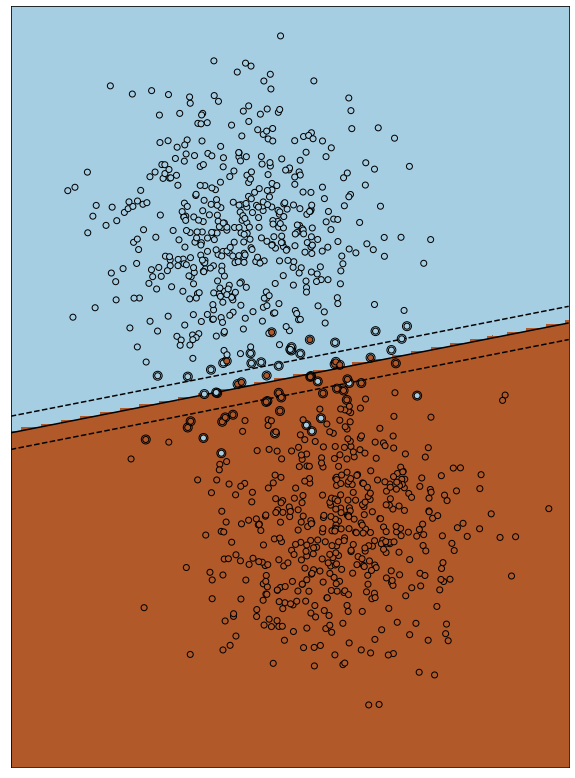

In [11]:
plot_SVM(blobs, labels, kernel='linear')

Полиномиальное ядро степени 2

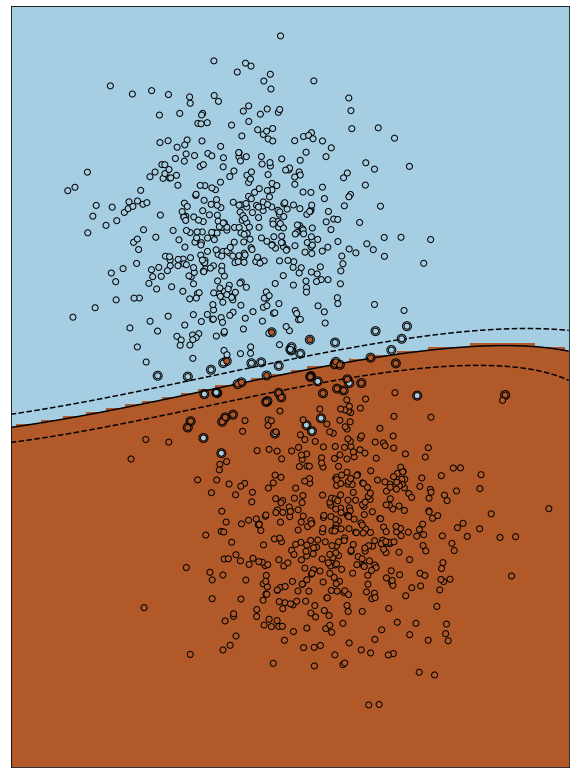

In [12]:
plot_SVM(blobs, labels, kernel='poly', degree=2)

Полиномиальное ядро степени 3

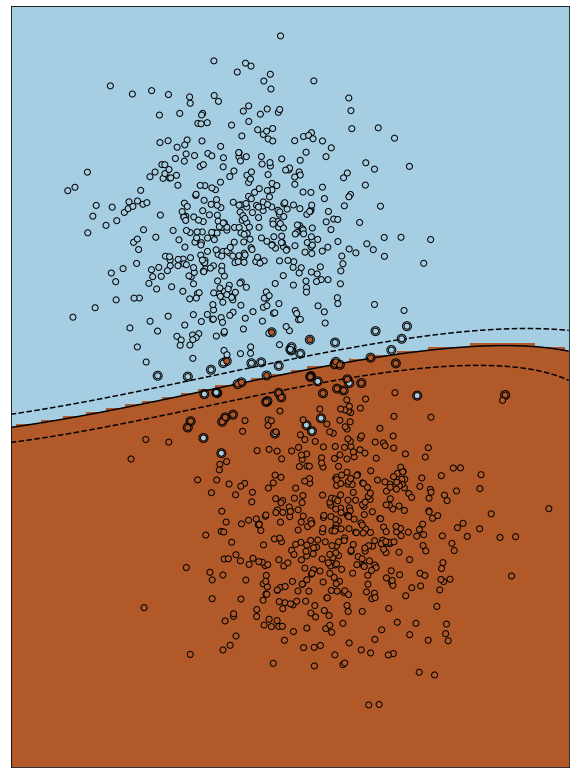

In [13]:
plot_SVM(blobs, labels, kernel='poly', degree=3)

Полиномиальное ядро степени 5

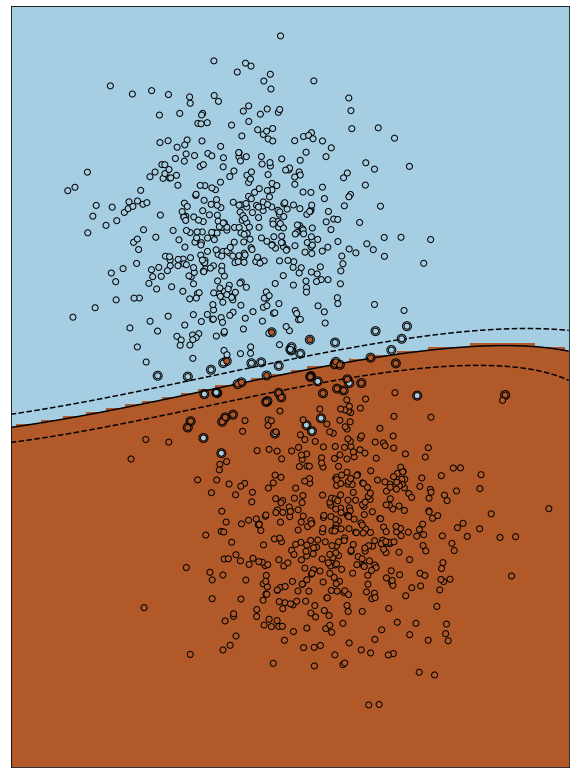

In [14]:
plot_SVM(blobs, labels, kernel='poly', degree=5)

Ядро RBF

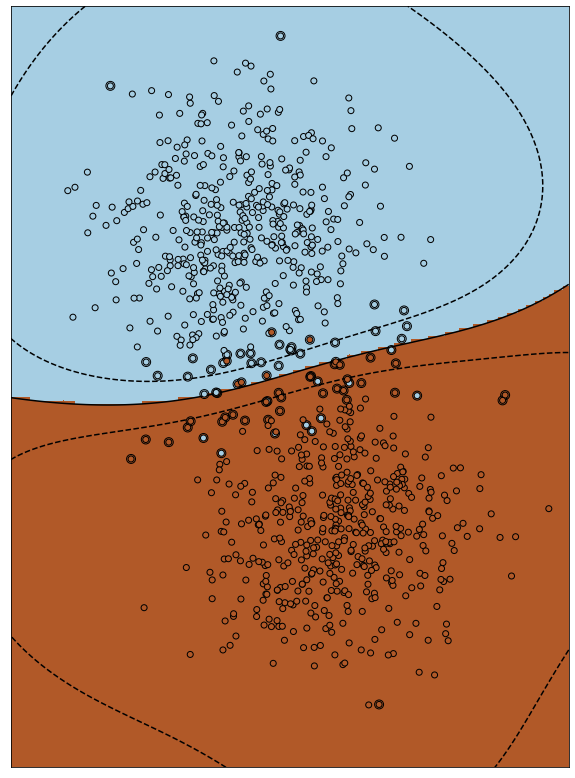

In [15]:
plot_SVM(blobs, labels, kernel='rbf')

### Задание 2 (3 балла)

Примените метод SVM на датасетах cancer и spam, разбитый предварительно на train (80%) и validate (20%). 

Сравните время работы SVM и Random Forest при близкой точности.

Датасет cancer

In [18]:
cancer_data = pd.read_csv('./hw7_data/cancer.csv') 
X = cancer_data.drop('label', axis=1).values 
Y = cancer_data['label'].values 
le = LabelEncoder()
Y = le.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [19]:
start_train_time = time.time()
svc = SVC(kernel='linear', C=5)
svc.fit(X_train, Y_train)
end_train_time = time.time()
start_test_time = time.time()
predictions = svc.predict(X_test)
end_test_time = time.time()
print(f'Accuracy: {accuracy_score(predictions, Y_test)}')
print(f'Training time SVC: {end_train_time - start_train_time} seconds')
print(f'Predicting time SVC: {end_test_time - start_test_time} seconds')

Accuracy: 0.9298245614035088
Training time SVC: 1.9752330780029297 seconds
Predicting time SVC: 0.00043320655822753906 seconds


In [20]:
start_train_time = time.time()
rf = RandomForestClassifier(max_depth=2, random_state=1)
rf.fit(X_train, Y_train)
end_train_time = time.time()
start_test_time = time.time()
predictions = rf.predict(X_test)
end_test_time = time.time()
print(f'Accuracy: {accuracy_score(predictions, Y_test)}')
print(f'Training time RF: {end_train_time - start_train_time} seconds')
print(f'Predicting time RF: {end_test_time - start_test_time} seconds')

Accuracy: 0.9385964912280702
Training time RF: 0.16330790519714355 seconds
Predicting time RF: 0.01067805290222168 seconds


Датасет spam

In [2]:
spam_data = pd.read_csv('./hw7_data/spam.csv') 
X = spam_data.drop('label', axis=1).values 
Y = spam_data['label'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [3]:
start_train_time = time.time()
svc = SVC(kernel='linear')
svc.fit(X_train, Y_train)
end_train_time = time.time()
start_test_time = time.time()
predictions = svc.predict(X_test)
end_test_time = time.time()
print(f'Accuracy: {accuracy_score(predictions, Y_test)}')
print(f'Training time SVC: {end_train_time - start_train_time} seconds')
print(f'Predicting time SVC: {end_test_time - start_test_time} seconds')

Accuracy: 0.9272529858849077
Training time SVC: 91.20141315460205 seconds
Predicting time SVC: 0.022548913955688477 seconds


In [4]:
start_train_time = time.time()
rf = RandomForestClassifier(max_depth=6, random_state=0)
rf.fit(X_train, Y_train)
end_train_time = time.time()
start_test_time = time.time()
predictions = rf.predict(X_test)
end_test_time = time.time()
print(f'Accuracy: {accuracy_score(predictions, Y_test)}')
print(f'Training time RF: {end_train_time - start_train_time} seconds')
print(f'Predicting time RF: {end_test_time - start_test_time} seconds')

Accuracy: 0.9229098805646037
Training time RF: 0.32770395278930664 seconds
Predicting time RF: 0.014522075653076172 seconds


Можно заметить, что при близкой точности random forest обучается намного быстрее на обоих датасетах. Время предсказания на датасете cancer гораздо меньше у SVC (в RF нужно ещё "просеять" все элементы через деревья, это занимает больше времени), а время предсказания на датасете spam для обоих алгоритмов соизмеримы.